# Summary

1)  load data

2)  PCA does not look necessary

3) Logistic regressions (assumptions not really met)

4) XGBoost 

# Feature importance analysis

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(threshold=30)

In [119]:
df = pd.read_csv(r'DataProcessing\\new_final_df.csv')
df = df.iloc[:,5:]
df.drop(columns = ['time','picture','birthplace','deathplace','birthdate','deathdate','parent','rating'], inplace=True)
df = df[[col for col in df.columns if not col.startswith(('Movement', 'Education', 'Specialty'))]].select_dtypes(include=['number', 'bool'])
df = df[(df.notna().all(axis=1))]  # Remove all censored images
df.head()

C:\Users\herre\AppData\Local\Temp\ipykernel_31900\1824527765.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'DataProcessing\\new_final_df.csv')


,AI_Generated,logit,edge_score,contrast_score,brightness_score,saturation_score,num_rels,classification,accuracy_prediction
0,0,-8.378802,46.383220,55.552072,112.148305,127.663731,1,0,1
1,0,-14.644643,47.354136,54.624181,124.601402,62.417748,1,0,1
2,0,-4.634872,28.550276,48.946494,103.395141,80.945548,5,1,0
3,0,-10.061778,67.087002,52.743048,166.384401,80.268604,0,0,1
4,0,-5.156153,58.546688,54.431662,87.995360,159.627900,0,1,0


## PCA

Imo, if we work with this small amount of components, it is not necessary.

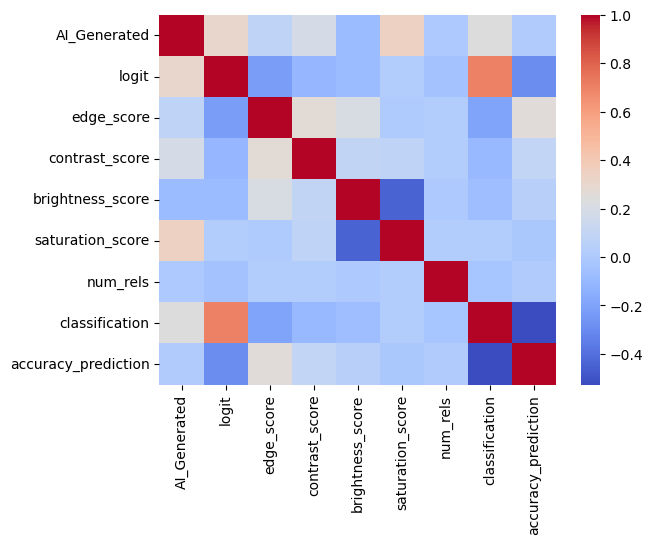

In [89]:
# Generate a correlation matrix
corr_matrix = df.corr()

# Create a heatmap using the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm')

# Show the plot
plt.show()

In [69]:
na_counts = df.isna().sum()

# Print the resulting series of NaN counts
print(na_counts)

AI_Generated           0
logit                  0
edge_score             0
contrast_score         0
brightness_score       0
saturation_score       0
num_rels               0
classification         0
accuracy_prediction    0
dtype: int64


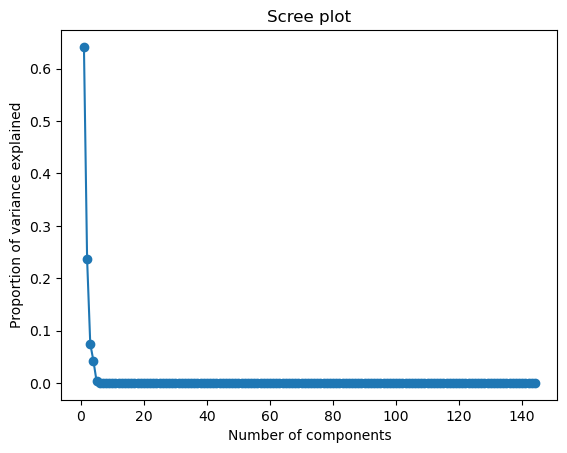

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Extract the numerical features from your dataset
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
X = df[num_cols]
X.drop(columns=['AI_Generated','classification','accuracy_prediction'], inplace=True)

# Fit a PCA model on your dataset
pca = PCA().fit(X)

# Plot the scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'o-')
plt.xlabel('Number of components')
plt.ylabel('Proportion of variance explained')
plt.title('Scree plot')
plt.show()


# Logistic regression

In [120]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Extract the feature columns and target column
X = df.drop(['AI_Generated','classification','accuracy_prediction'], axis=1)
y = df['AI_Generated']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit a logistic regression model on the training data
X_train = sm.add_constant(X_train)
model = sm.Logit(y_train, X_train)
result = model.fit()

# Print the summary of the model
print(result.summary())

# Evaluate the performance of the model
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)


Optimization terminated successfully.
         Current function value: 0.380891
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           AI_Generated   No. Observations:                10928
Model:                          Logit   Df Residuals:                    10921
Method:                           MLE   Df Model:                            6
Date:                Wed, 22 Feb 2023   Pseudo R-squ.:                  0.2958
Time:                        16:43:37   Log-Likelihood:                -4162.4
converged:                       True   LL-Null:                       -5910.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -5.5378      0.205    -27.029      0.000      -5.939      -5.136
logit      

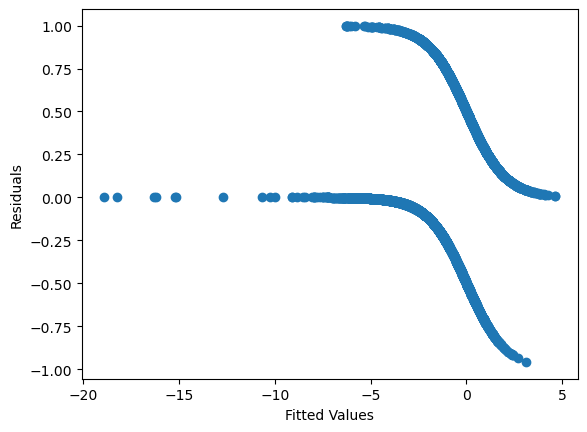

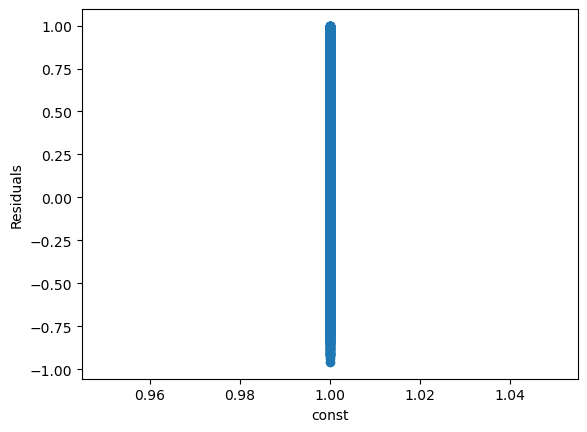

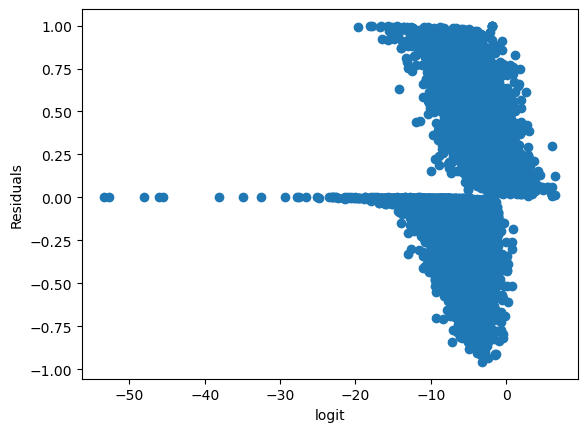

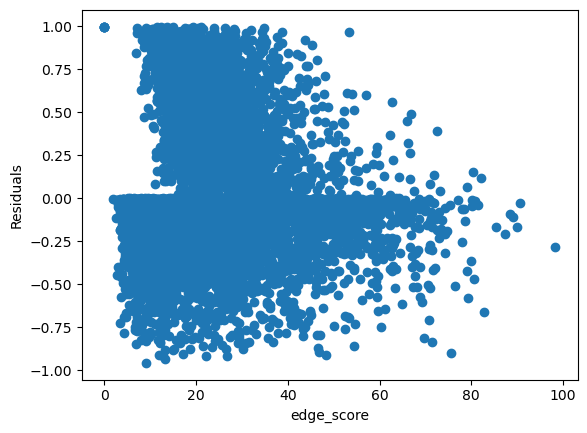

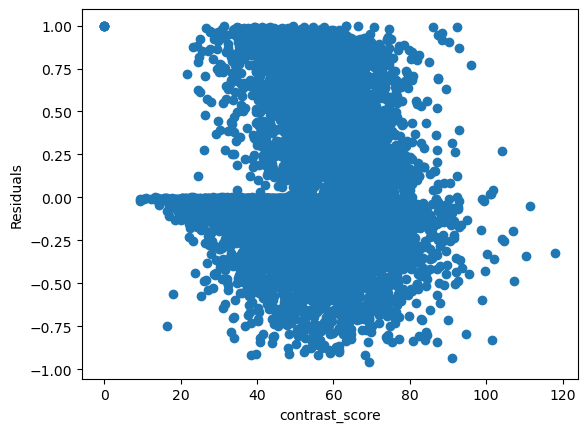

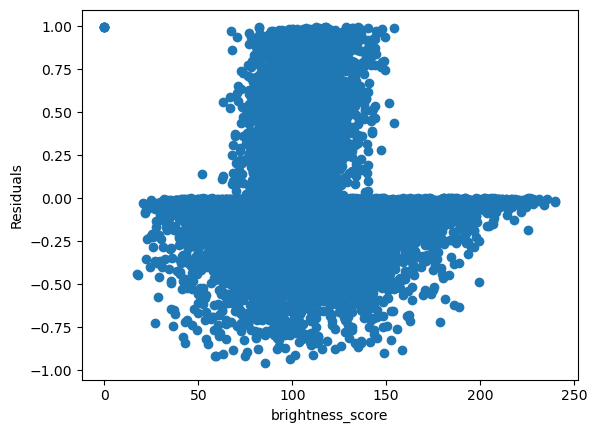

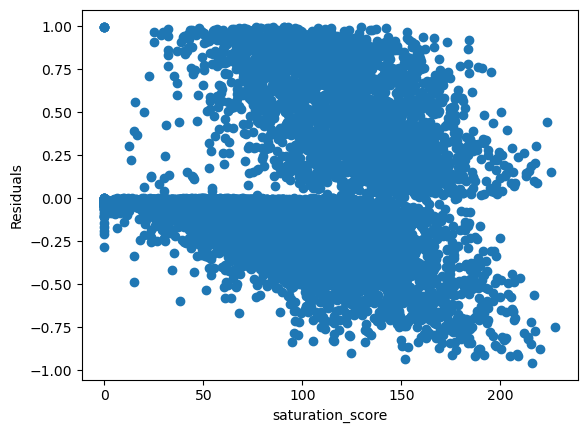

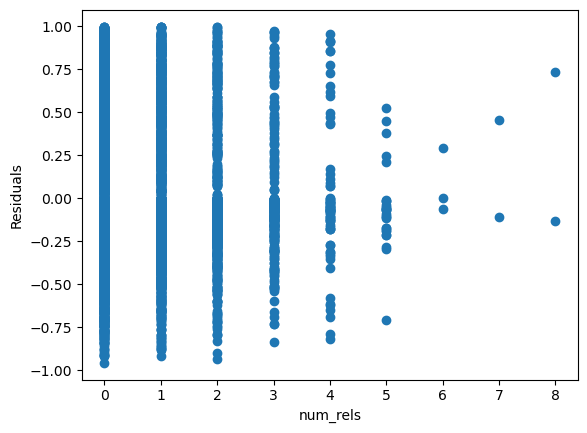

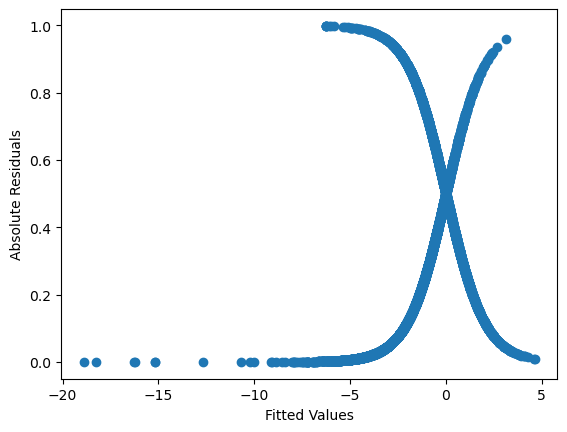

   VIF Factor          features
0    4.459927             logit
1    4.497672        edge_score
2   14.162176    contrast_score
3    8.380730  brightness_score
4    5.568677  saturation_score
5    1.401360          num_rels


In [121]:
# Assumptions

# Check assumptions
fitted_values = result.fittedvalues
residuals = result.resid_response

# Linearity
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Independence
for column in X_train.columns:
    plt.scatter(X_train[column], residuals)
    plt.xlabel(column)
    plt.ylabel('Residuals')
    plt.show()

# Homoscedasticity
plt.scatter(fitted_values, abs(residuals))
plt.xlabel('Fitted Values')
plt.ylabel('Absolute Residuals')
plt.show()

# Multicollinearity: Compute VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)


# XGBoost

In [113]:
df = pd.read_csv(r'DataProcessing\\new_final_df.csv')
df = df.iloc[:,5:]
df = df.loc[:, ~df.columns.str.endswith('x')]
df.drop(columns = ['time','picture','birthplace','deathplace','birthdate','deathdate','parent','rating'], inplace=True)
#df = df[[col for col in df.columns if not col.startswith(('Movement', 'Education', 'Specialty'))]].select_dtypes(include=['number', 'bool'])
df = df[(df.notna().all(axis=1))]  # Remove all censored images
df.head()

C:\Users\herre\AppData\Local\Temp\ipykernel_31900\4015829179.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'DataProcessing\\new_final_df.csv')


,AI_Generated,logit,edge_score,contrast_score,brightness_score,saturation_score,num_rels,Movement_0,Movement_1,Movement_2,Movement_3,Movement_4,Movement_5,Movement_6,Movement_7,Movement_8,Movement_9,Movement_10,Movement_11,Movement_12,Movement_13,Movement_14,Movement_15,Movement_16,Movement_17,Movement_18,Movement_19,Movement_20,Movement_21,Movement_22,Movement_23,Movement_24,Movement_25,Movement_26,Movement_27,Movement_29,Movement_30,Movement_31,Movement_32,Movement_33,Movement_34,Movement_35,Movement_36,Movement_37,Movement_38,Movement_39,Movement_40,Movement_41,Movement_42,Movement_43,Movement_44,Movement_45,Movement_46,Movement_47,Movement_48,Movement_49,Movement_50,Movement_51,Movement_52,Movement_53,Movement_54,Specialty_0,Specialty_1,Specialty_2,Specialty_3,Specialty_4,Specialty_5,Specialty_6,Specialty_7,Specialty_8,Specialty_9,Specialty_10,Specialty_11,Specialty_12,Specialty_13,Specialty_14,Specialty_15,Specialty_16,Specialty_17,Specialty_18,Specialty_19,Specialty_20,Specialty_21,Specialty_22,Specialty_23,Specialty_24,Specialty_25,Specialty_26,Specialty_27,Specialty_28,Specialty_29,Specialty_30,Specialty_31,Specialty_32,Specialty_33,Specialty_34,Specialty_35,Education_0_y,Education_1_y,Education_2_y,Education_3_y,Education_4_y,Education_5_y,Education_6_y,Education_7_y,Education_8_y,Education_9_y,Education_10_y,Education_11_y,Education_12_y,Education_13_y,Education_14_y,Education_15_y,Education_16_y,Education_17_y,Education_18_y,Education_19_y,Education_20_y,Education_21_y,Education_22_y,Education_23_y,Education_24_y,Education_25_y,Education_26_y,Education_27_y,Education_28_y,Education_29_y,Education_30_y,Education_31_y,Education_32_y,Education_33_y,Education_34_y,Education_35_y,Education_36_y,Education_37_y,Education_38_y,Education_39_y,Education_40_y,Education_41_y,Education_42_y,Education_43_y,Education_44_y,Education_45_y,Education_46_y,Education_47_y,classification,accuracy_prediction
0,0,-8.378802,46.383220,55.552072,112.148305,127.663731,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,0,-14.644643,47.354136,54.624181,124.601402,62.417748,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,0,-4.634872,28.550276,48.946494,103.395141,80.945548,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,0,-10.061778,67.087002,52.743048,166.384401,80.268604,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0

In [114]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Extract the feature columns and target column
X = df.drop(['AI_Generated','classification','accuracy_prediction'], axis=1)
y = df['AI_Generated']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on testing set
y_pred = model.predict(X_test)

# Evaluate accuracy of model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

# Extract feature importances and store them in a pandas dataframe
importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=False)

print(importance)


Accuracy: 87.55%
              Feature  Importance
55        Movement_50    0.064290
0               logit    0.057811
57        Movement_52    0.056324
99      Education_3_y    0.055928
7          Movement_1    0.054862
112    Education_16_y    0.048876
113    Education_17_y    0.042717
53        Movement_48    0.042149
3    brightness_score    0.040857
36        Movement_31    0.035480
49        Movement_44    0.033863
4    saturation_score    0.033832
127    Education_31_y    0.031672
21        Movement_15    0.031461
1          edge_score    0.026389
60        Specialty_0    0.026128
13         Movement_7    0.024659
16        Movement_10    0.023587
68        Specialty_8    0.023040
106    Education_10_y    0.022452
109    Education_13_y    0.020831
19        Movement_13    0.019593
33        Movement_27    0.018513
66        Specialty_6    0.018472
22        Movement_16    0.016954
2      contrast_score    0.013355
118    Education_22_y    0.011805
20        Movement_14    0.0115

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# Define XGBoost model
model = xgb.XGBClassifier()

# Perform 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)

# Calculate mean and standard deviation of accuracy scores
mean_score = scores.mean()
std_score = scores.std()
print('Accuracy: %.2f%% (+/- %.2f%%)' % (mean_score * 100.0, std_score * 100.0))

Accuracy: 88.79% (+/- 1.24%)
